In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Preprocess Information

In [2]:
def find_max_time(events):
    times = []
    for e in events:
        times.append(e[1])
    return max(times)

In [3]:
def split_data(data):
    data_out = []
    for line in data:
        data_out.append(line.split())
    return data_out

def preprocess_file(filename):
    with open(filename, 'r') as f:
        data = f.readlines()
        splitted_data = split_data(data)
        data = np.array(splitted_data, dtype=np.float64)
        return data

In [4]:
def preprocess_drops(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        data = []
        for line in lines:
            if line.startswith('d'):
                data.append(line)
        data = split_data(data)
        data_tmp = []
        for row in data:
            data_tmp.append([row[1], row[7]])
        data = np.array(data_tmp, dtype=np.float64)
        return data

In [5]:
def merge_data_drops(data, drops):
    drops_mat = np.zeros((data.shape[0], 2))
    di = 0
    for drop in drops:
        while di < data.shape[0]-1 and not (data[di][0] <= drop[0] < data[di+1][0]):
            di += 1
        if drop[1] == 1:
            drops_mat[di][0] += 1
        else:
            drops_mat[di][1] += 1
    data = np.concatenate((data, drops_mat), axis=1)
    return data

def preprocess(i, j):
    ist = str(i)
    jst = str(j)
    if len(jst) < 2:
        jst = '0'+jst
    filename = 'out/out'+ist+jst+'.tr'
    data = preprocess_file(filename)
    drops = preprocess_drops(filename+'_auto')
    final = merge_data_drops(data, drops)
    return final

# MainProcess Function

In [6]:
def mean_data(datas):
    data_sum = np.zeros(datas[0].shape)
    for data in datas:
        data_sum += data
    return data_sum/len(datas)

def main_process():
    datas = [[], [], []]
    for i in range(1, 4):
        for j in range(1, 11):
            datas[i-1].append(preprocess(i, j))
    return mean_data(datas[0]).T, mean_data(datas[1]).T, mean_data(datas[2]).T

# Generate and Store data

In [7]:
reno, tahoe, vegas = main_process()
time_ind = 0
goodput1_ind = 1
goodput2_ind = 2
cwnd1_ind = 3
cwnd2_ind = 4
rtt1_ind = 5
rtt2_ind = 6
drop1_ind = 7
drop2_ind = 8

if not os.path.exists('csv_files'):
    os.makedirs('csv_files')
if not os.path.exists('plots'):
    os.makedirs('plots')


np.savetxt('csv_files/reno.csv', reno, delimiter=',')
np.savetxt('csv_files/tahoe.csv', tahoe, delimiter=',')
np.savetxt('csv_files/vegas.csv', vegas, delimiter=',')
np.savetxt('csv_files/cwnd.csv', np.concatenate((np.expand_dims(reno[time_ind], axis=0),
                                       reno[cwnd1_ind:cwnd2_ind+1],
                                       tahoe[cwnd1_ind:cwnd2_ind+1],
                                       vegas[cwnd1_ind:cwnd2_ind+1]), axis=0), delimiter=',')
np.savetxt('csv_files/goodput.csv', np.concatenate((np.expand_dims(reno[time_ind], axis=0),
                                          reno[goodput1_ind:goodput2_ind+1],
                                          tahoe[goodput1_ind:goodput2_ind+1],
                                          vegas[goodput1_ind:goodput2_ind+1]), axis=0), delimiter=',')
np.savetxt('csv_files/drop.csv', np.concatenate((np.expand_dims(reno[time_ind], axis=0),
                                        reno[drop1_ind:drop2_ind+1],
                                        tahoe[drop1_ind:drop2_ind+1],
                                        vegas[drop1_ind:drop2_ind+1]), axis=0), delimiter=',')
np.savetxt('csv_files/rtt.csv', np.concatenate((np.expand_dims(reno[time_ind], axis=0),
                                      reno[rtt1_ind:rtt2_ind+1],
                                      tahoe[rtt1_ind:rtt2_ind+1],
                                      vegas[rtt1_ind:rtt2_ind+1]), axis=0), delimiter=',')

# CWND

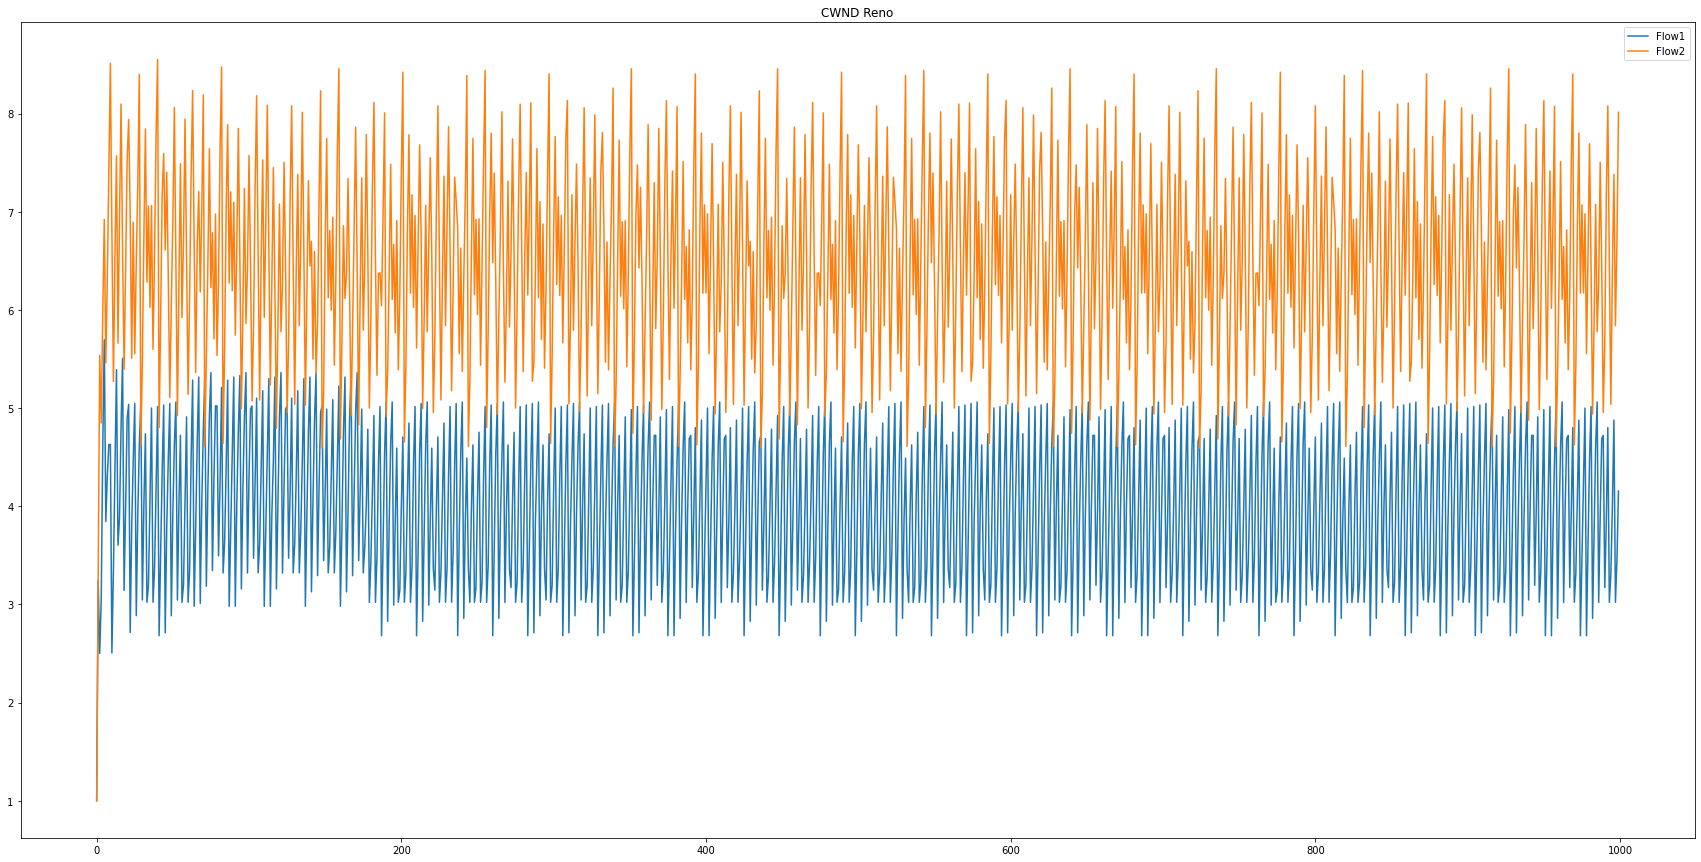

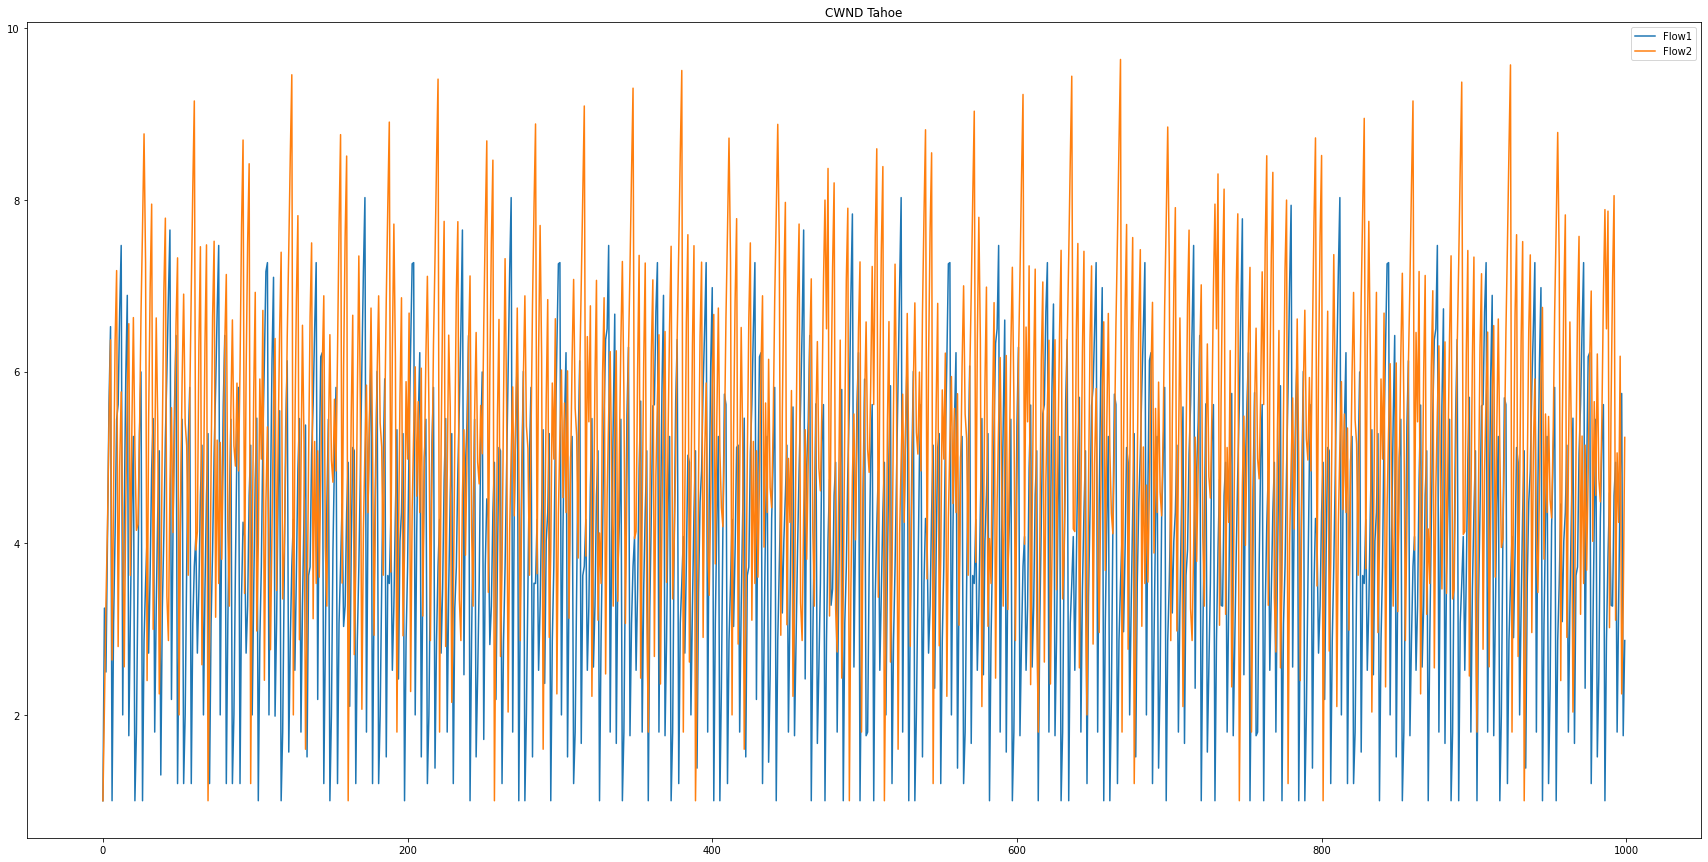

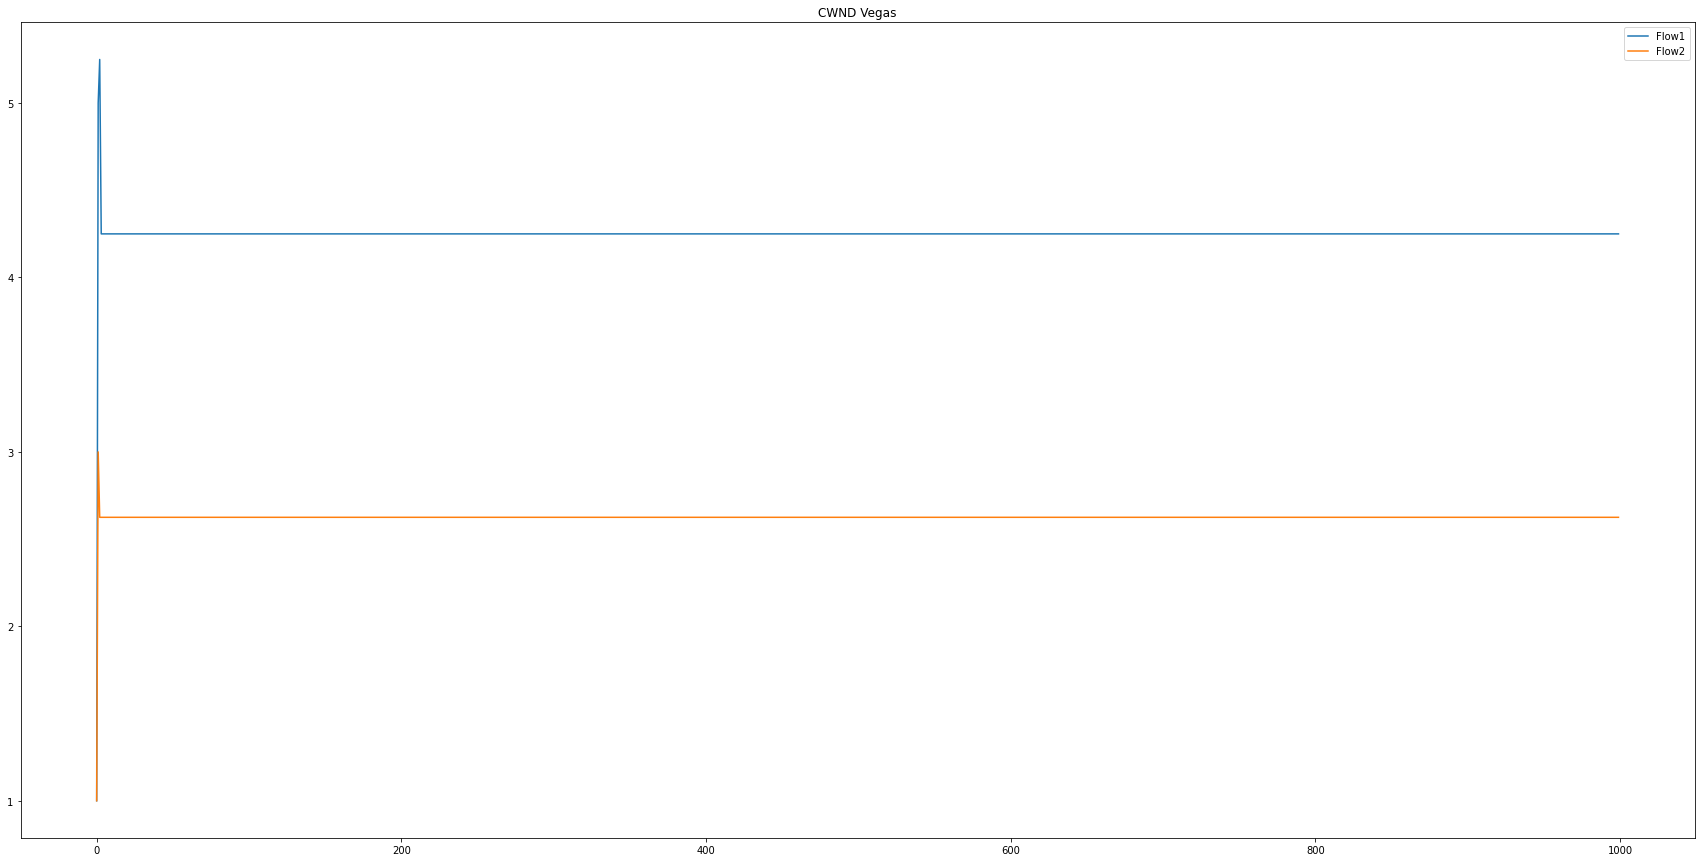

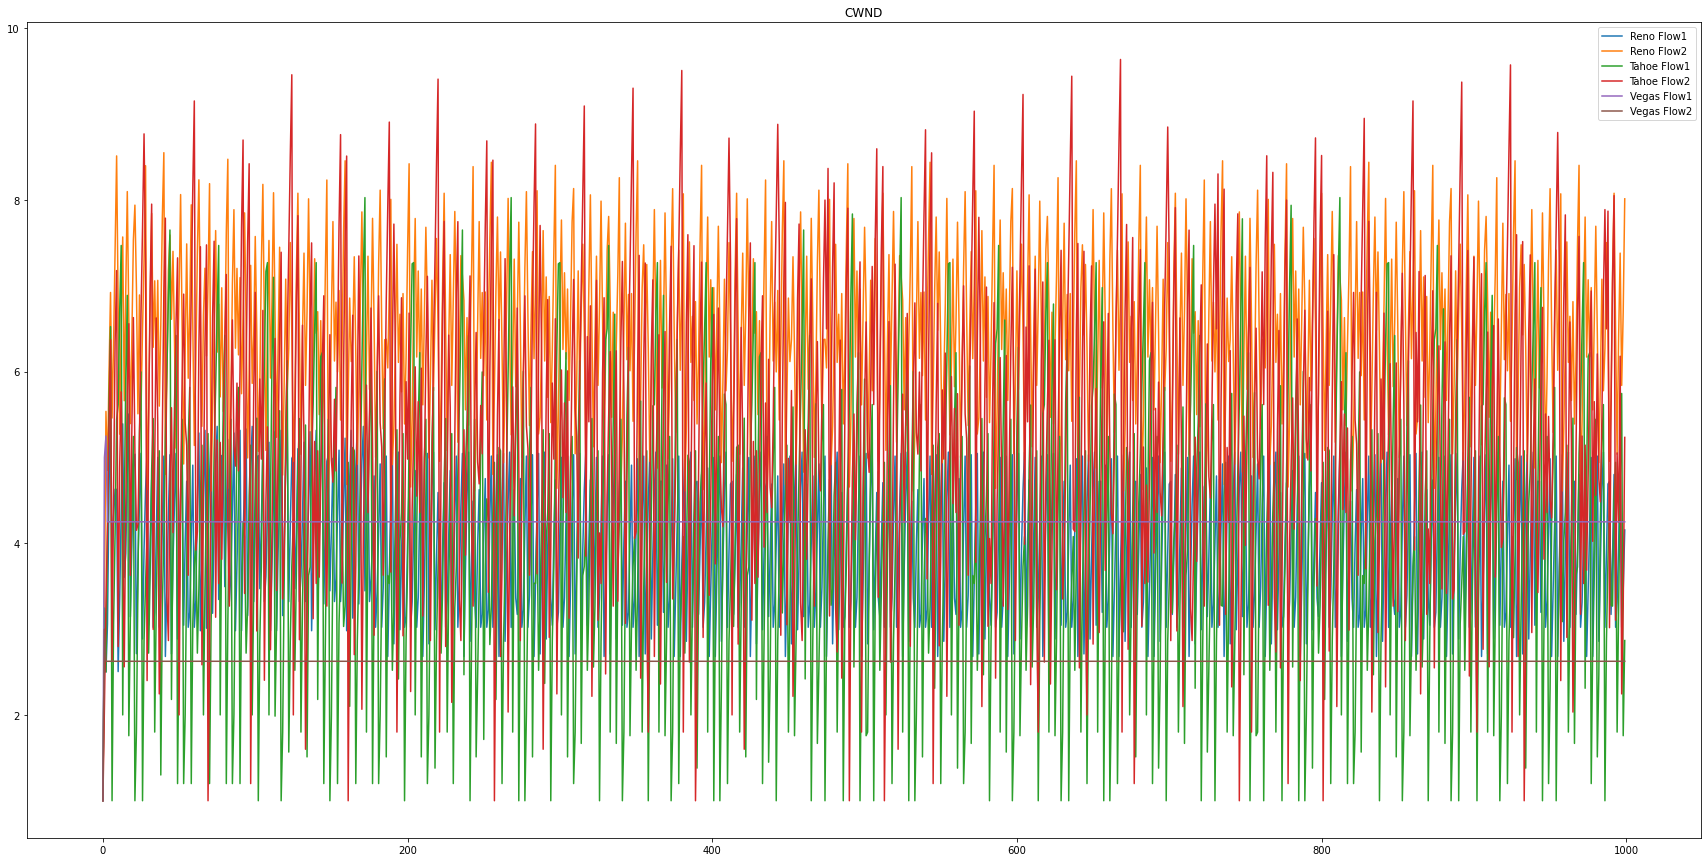

In [8]:
plt.figure(figsize=(30, 15))
plt.plot(reno[time_ind], reno[cwnd1_ind])
plt.plot(reno[time_ind], reno[cwnd2_ind])
plt.legend(['Flow1', 'Flow2'])
plt.title('CWND Reno')
plt.savefig('plots/cwnd_reno.png')
plt.show()

plt.figure(figsize=(30, 15))
plt.plot(tahoe[time_ind], tahoe[cwnd1_ind])
plt.plot(tahoe[time_ind], tahoe[cwnd2_ind])
plt.legend(['Flow1', 'Flow2'])
plt.title('CWND Tahoe')
plt.savefig('plots/cwnd_tahoe.png')
plt.show()

plt.figure(figsize=(30, 15))
plt.plot(vegas[time_ind], vegas[cwnd1_ind])
plt.plot(vegas[time_ind], vegas[cwnd2_ind])
plt.legend(['Flow1', 'Flow2'])
plt.title('CWND Vegas')
plt.savefig('plots/cwnd_vegas.png')
plt.show()
#----------------------------------------------------
plt.figure(figsize=(30, 15))
plt.plot(reno[time_ind], reno[cwnd1_ind])
plt.plot(reno[time_ind], reno[cwnd2_ind])
plt.plot(tahoe[time_ind], tahoe[cwnd1_ind])
plt.plot(tahoe[time_ind], tahoe[cwnd2_ind])
plt.plot(vegas[time_ind], vegas[cwnd1_ind])
plt.plot(vegas[time_ind], vegas[cwnd2_ind])
plt.legend(['Reno Flow1', 'Reno Flow2', 'Tahoe Flow1', 'Tahoe Flow2', 'Vegas Flow1', 'Vegas Flow2'])
plt.title('CWND')
plt.savefig('plots/cwnd_full.png')
plt.show()

# GoodPut

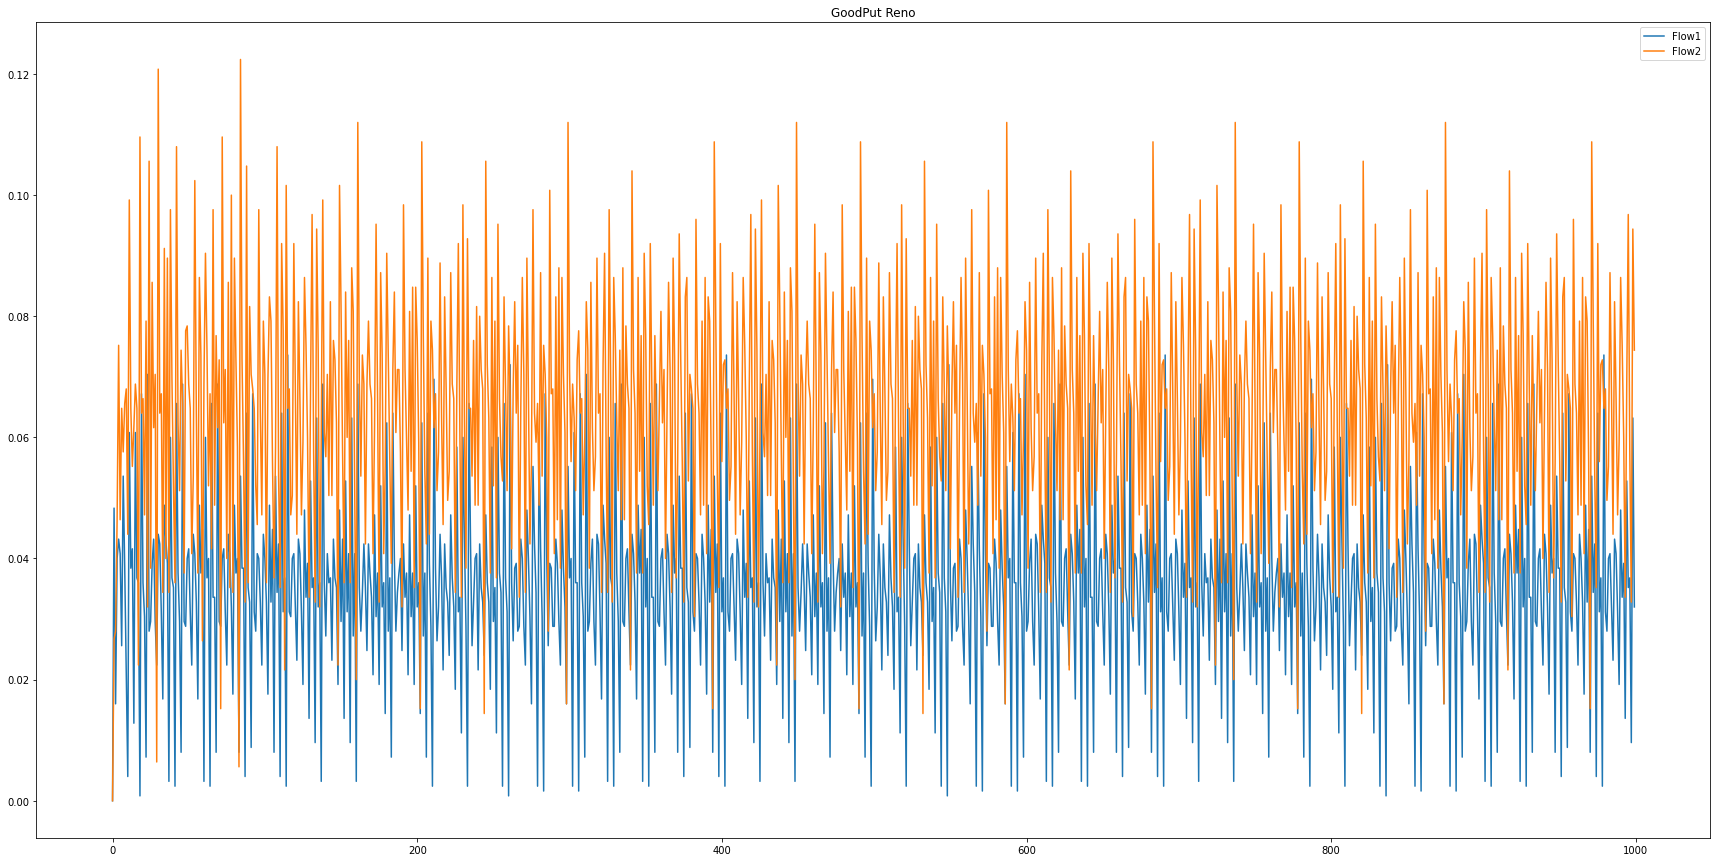

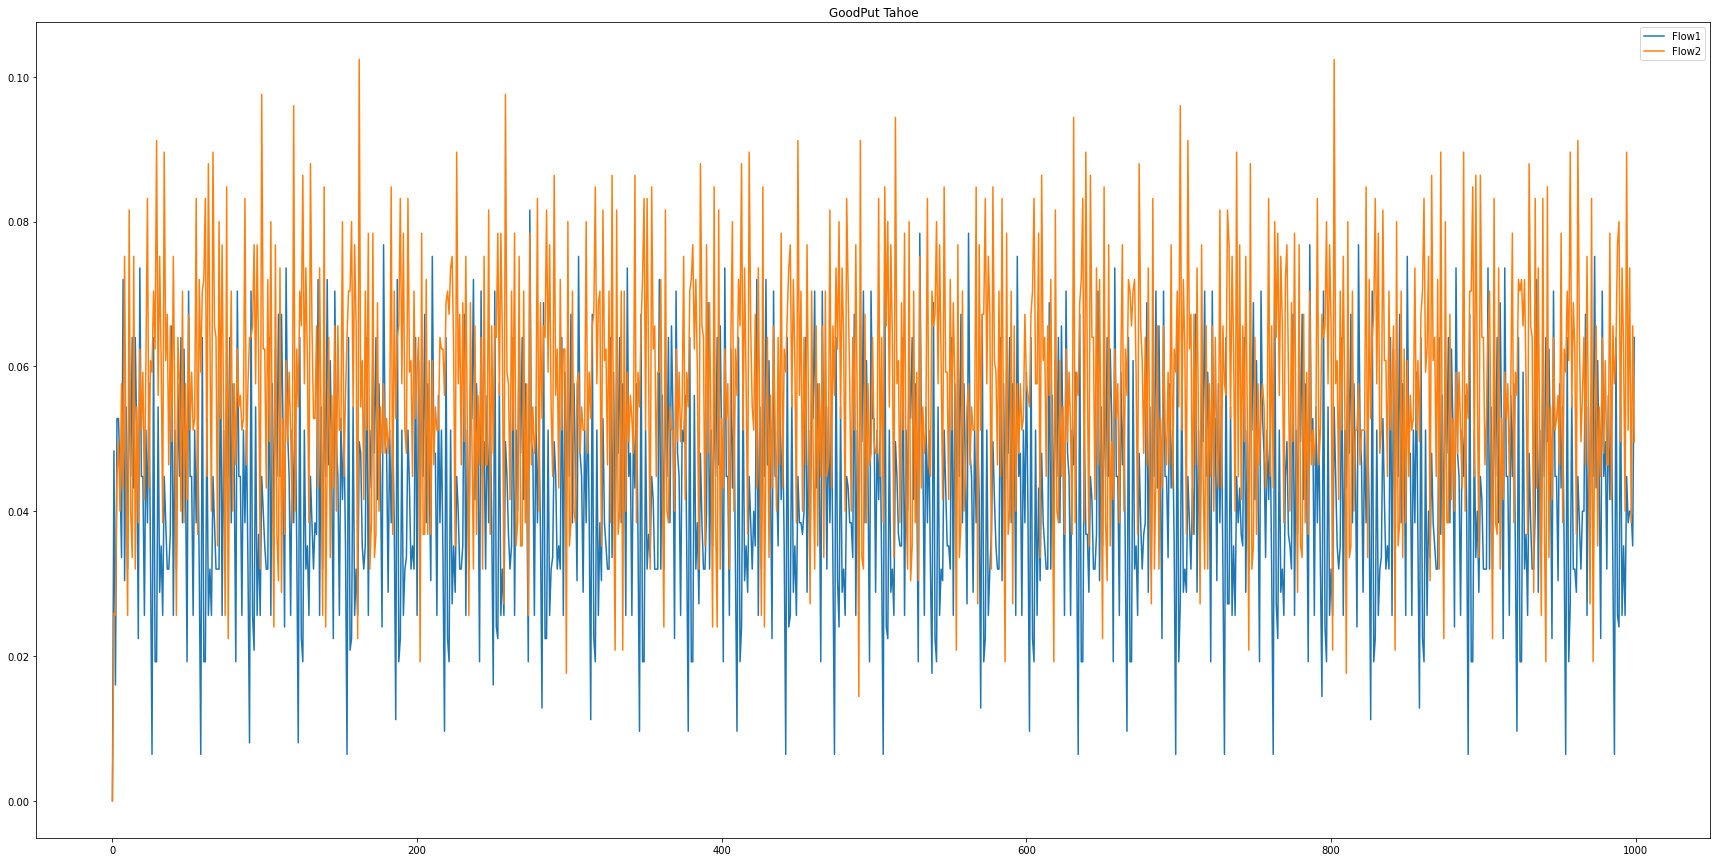

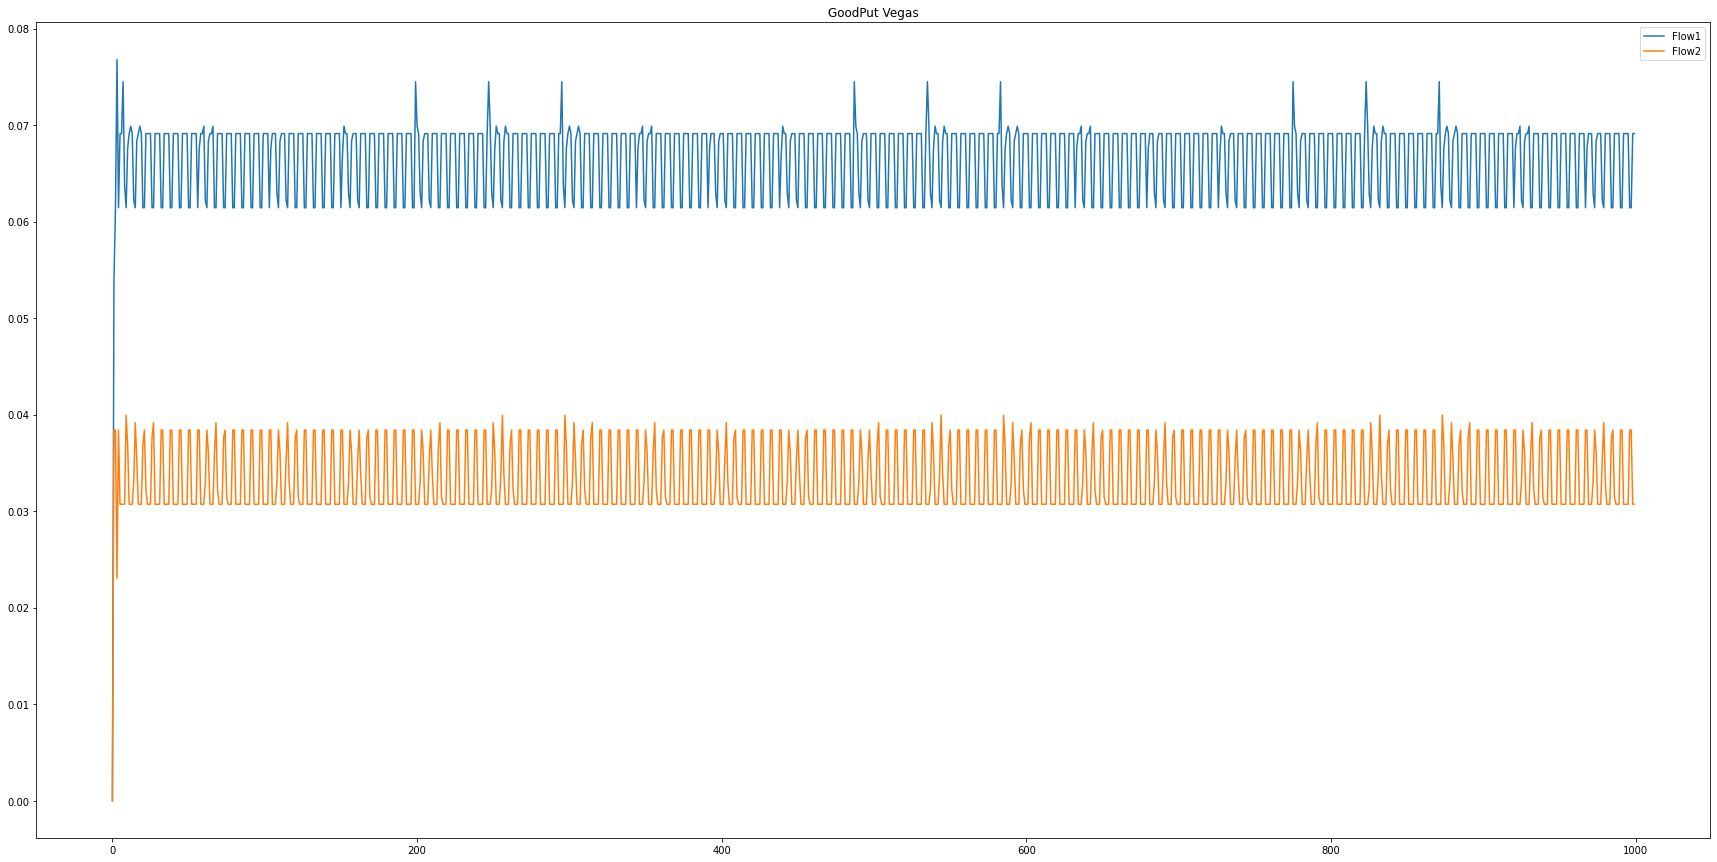

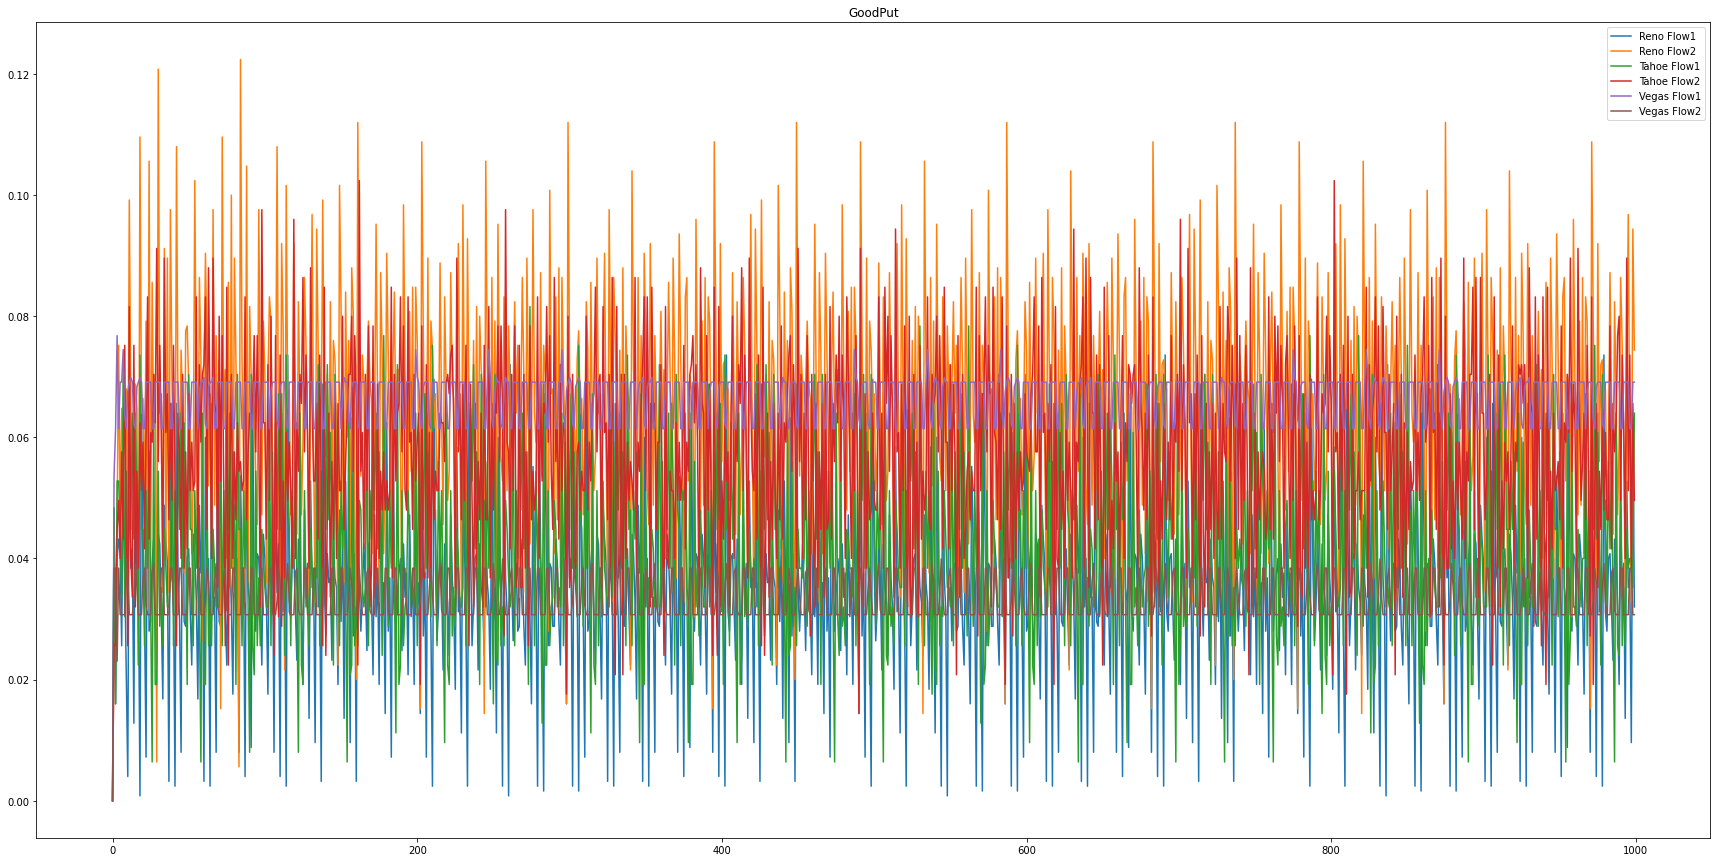

In [9]:
plt.figure(figsize=(30, 15))
plt.plot(reno[time_ind], reno[goodput1_ind])
plt.plot(reno[time_ind], reno[goodput2_ind])
plt.legend(['Flow1', 'Flow2'])
plt.title('GoodPut Reno')
plt.savefig('plots/goodput_reno.png')
plt.show()

plt.figure(figsize=(30, 15))
plt.plot(tahoe[time_ind], tahoe[goodput1_ind])
plt.plot(tahoe[time_ind], tahoe[goodput2_ind])
plt.legend(['Flow1', 'Flow2'])
plt.title('GoodPut Tahoe')
plt.savefig('plots/goodput_tahoe.png')
plt.show()

plt.figure(figsize=(30, 15))
plt.plot(vegas[time_ind], vegas[goodput1_ind])
plt.plot(vegas[time_ind], vegas[goodput2_ind])
plt.legend(['Flow1', 'Flow2'])
plt.title('GoodPut Vegas')
plt.savefig('plots/goodput_vegas.png')
plt.show()
#---------------------------------------------------------
plt.figure(figsize=(30, 15))
plt.plot(reno[time_ind], reno[goodput1_ind])
plt.plot(reno[time_ind], reno[goodput2_ind])
plt.plot(tahoe[time_ind], tahoe[goodput1_ind])
plt.plot(tahoe[time_ind], tahoe[goodput2_ind])
plt.plot(vegas[time_ind], vegas[goodput1_ind])
plt.plot(vegas[time_ind], vegas[goodput2_ind])
plt.legend(['Reno Flow1', 'Reno Flow2', 'Tahoe Flow1', 'Tahoe Flow2', 'Vegas Flow1', 'Vegas Flow2'])
plt.title('GoodPut')
plt.savefig('plots/goodput_full.png')
plt.show()

# DropRate

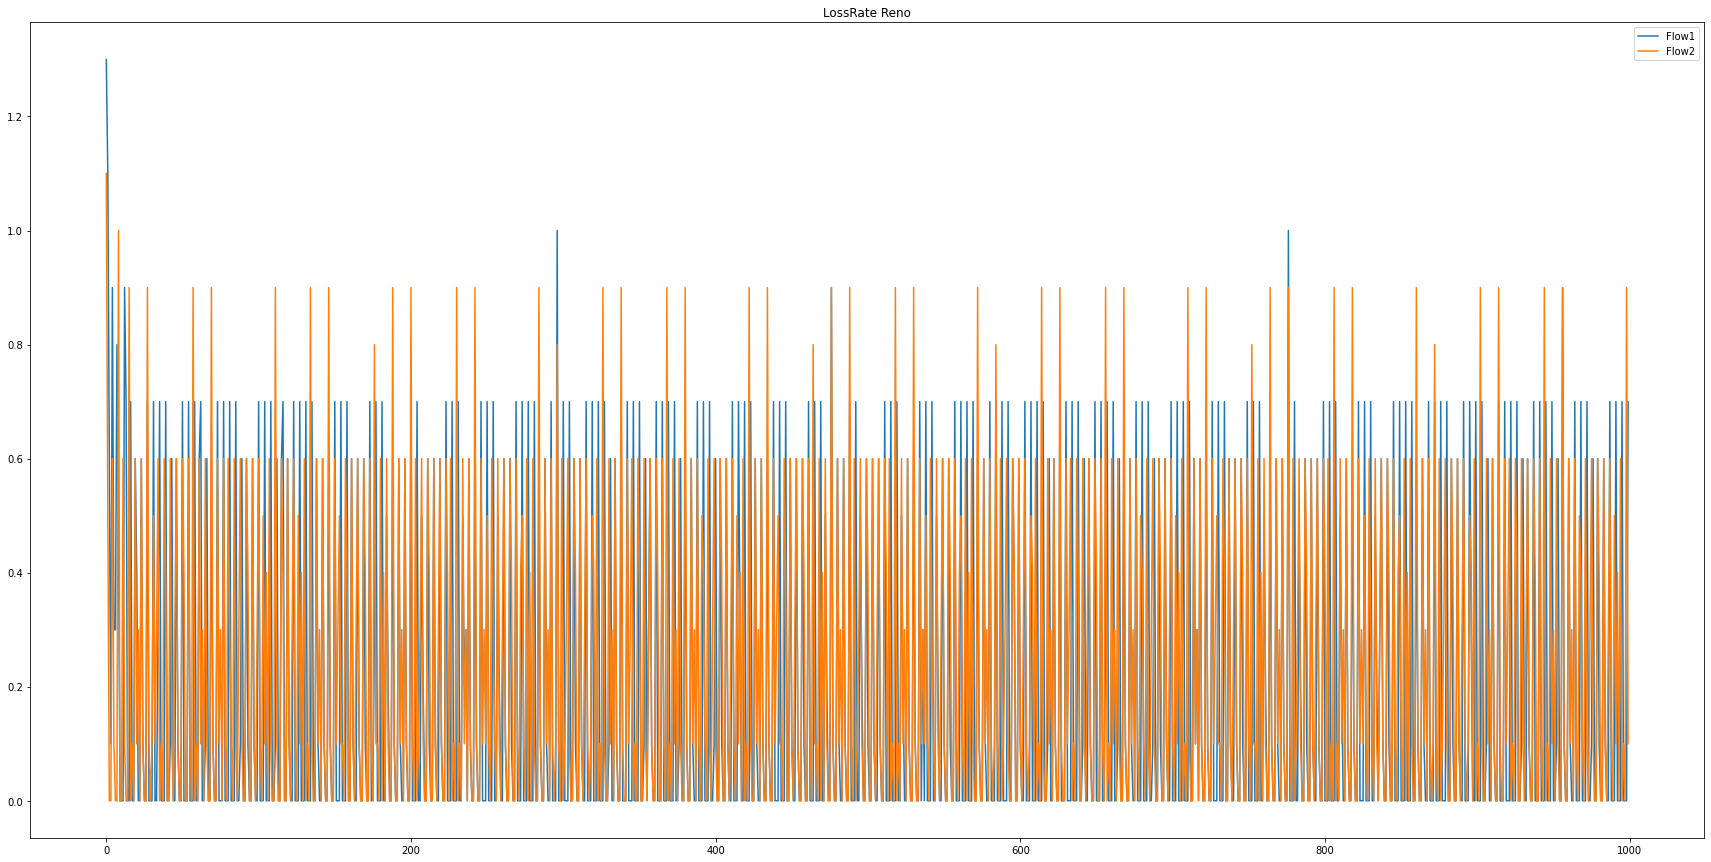

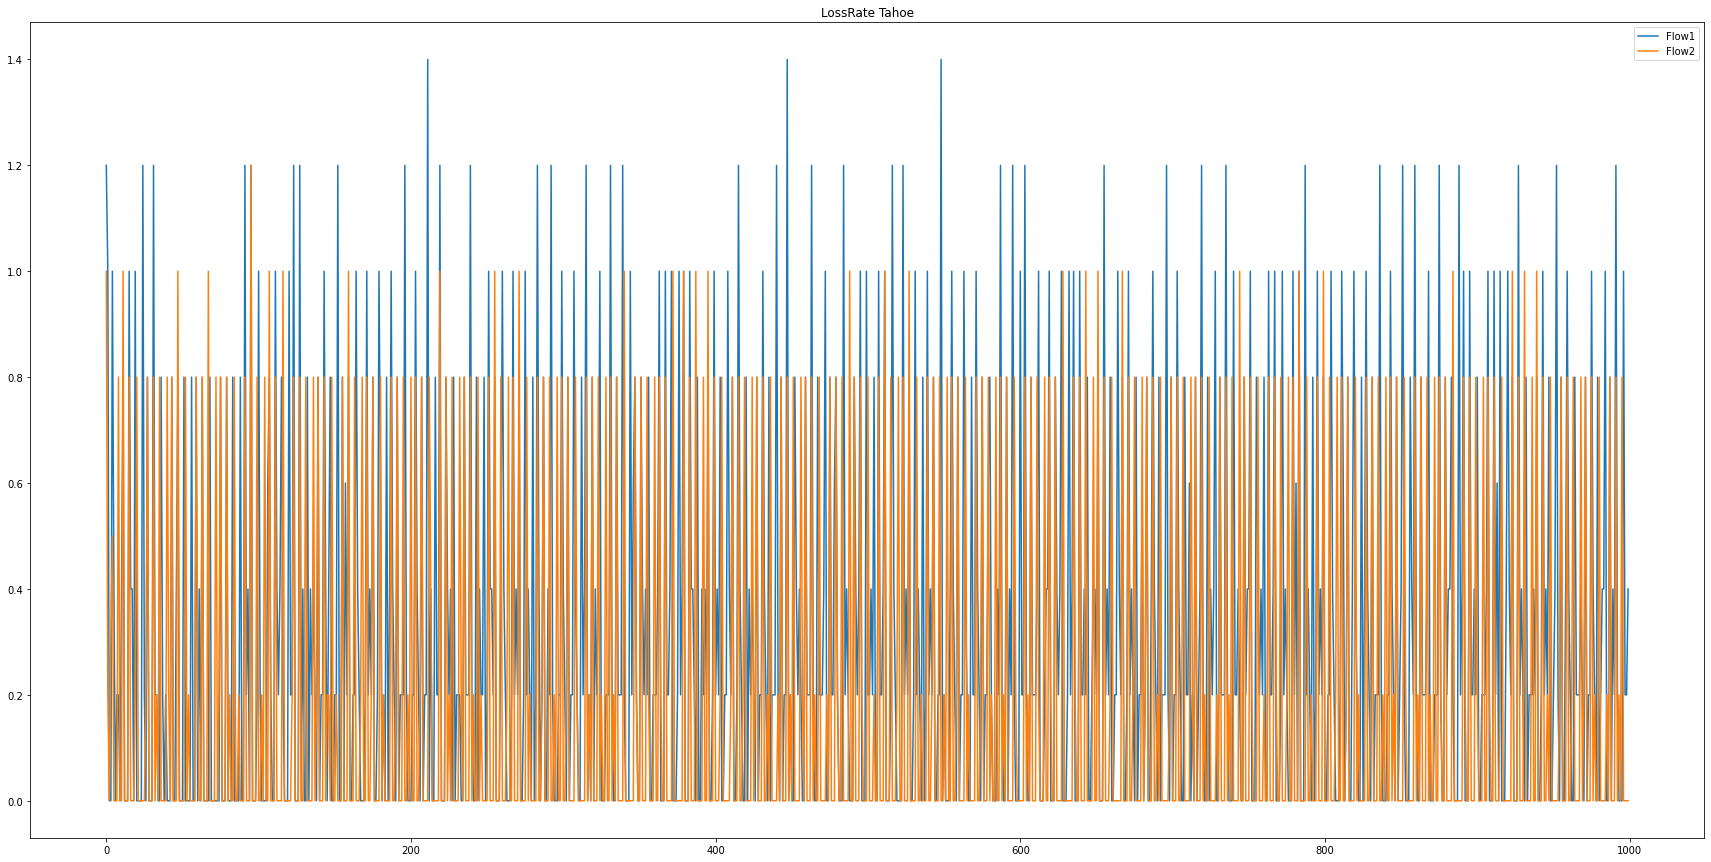

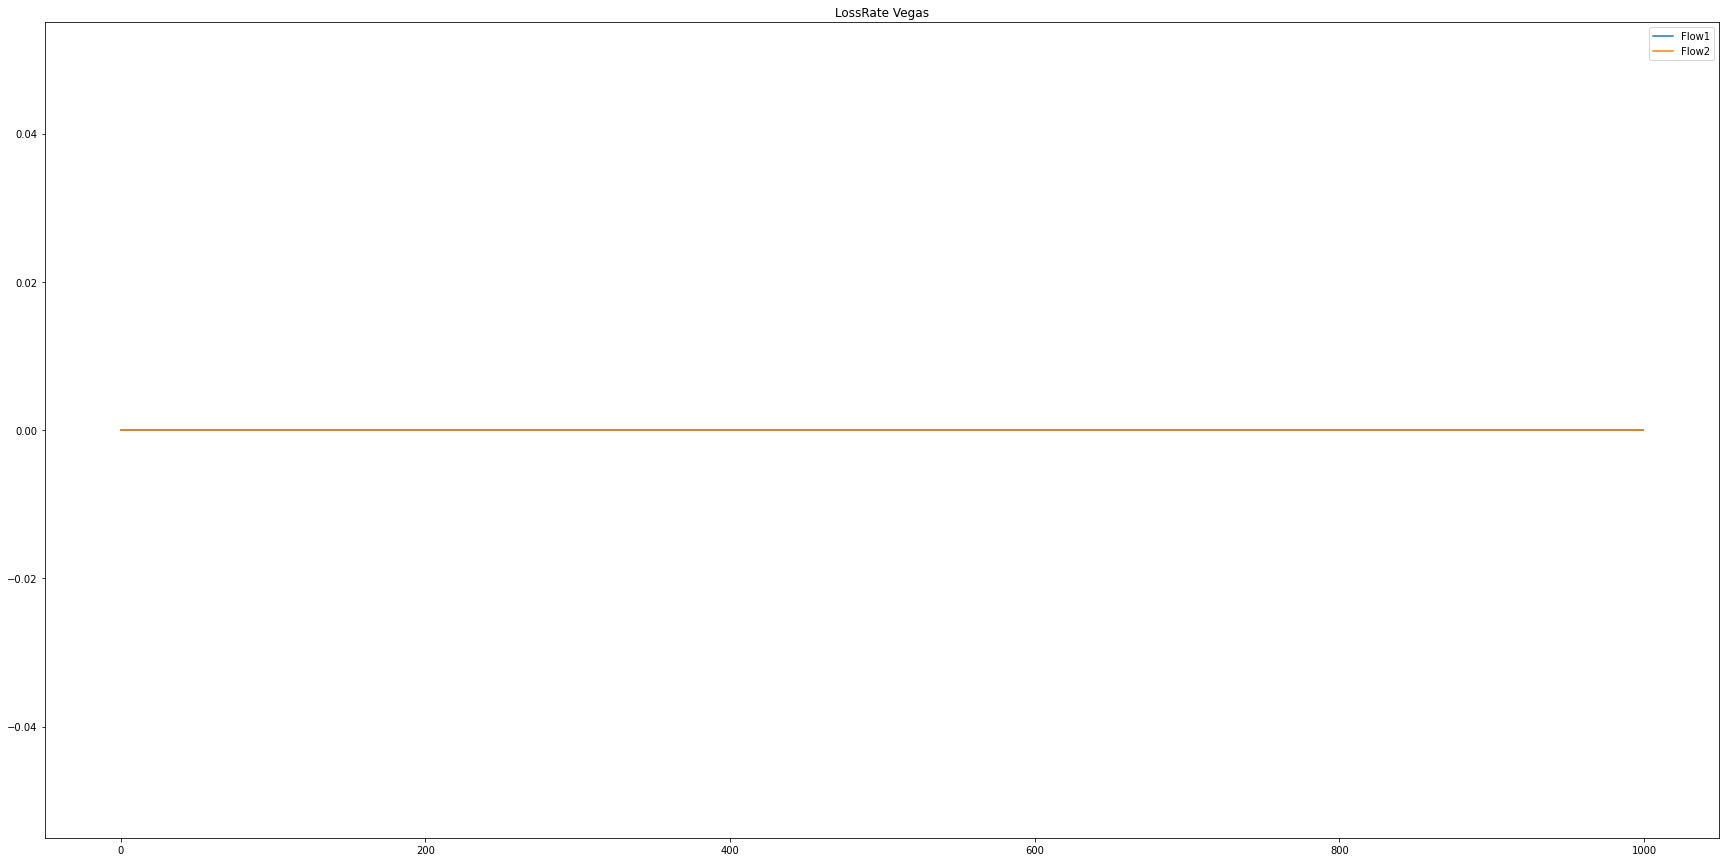

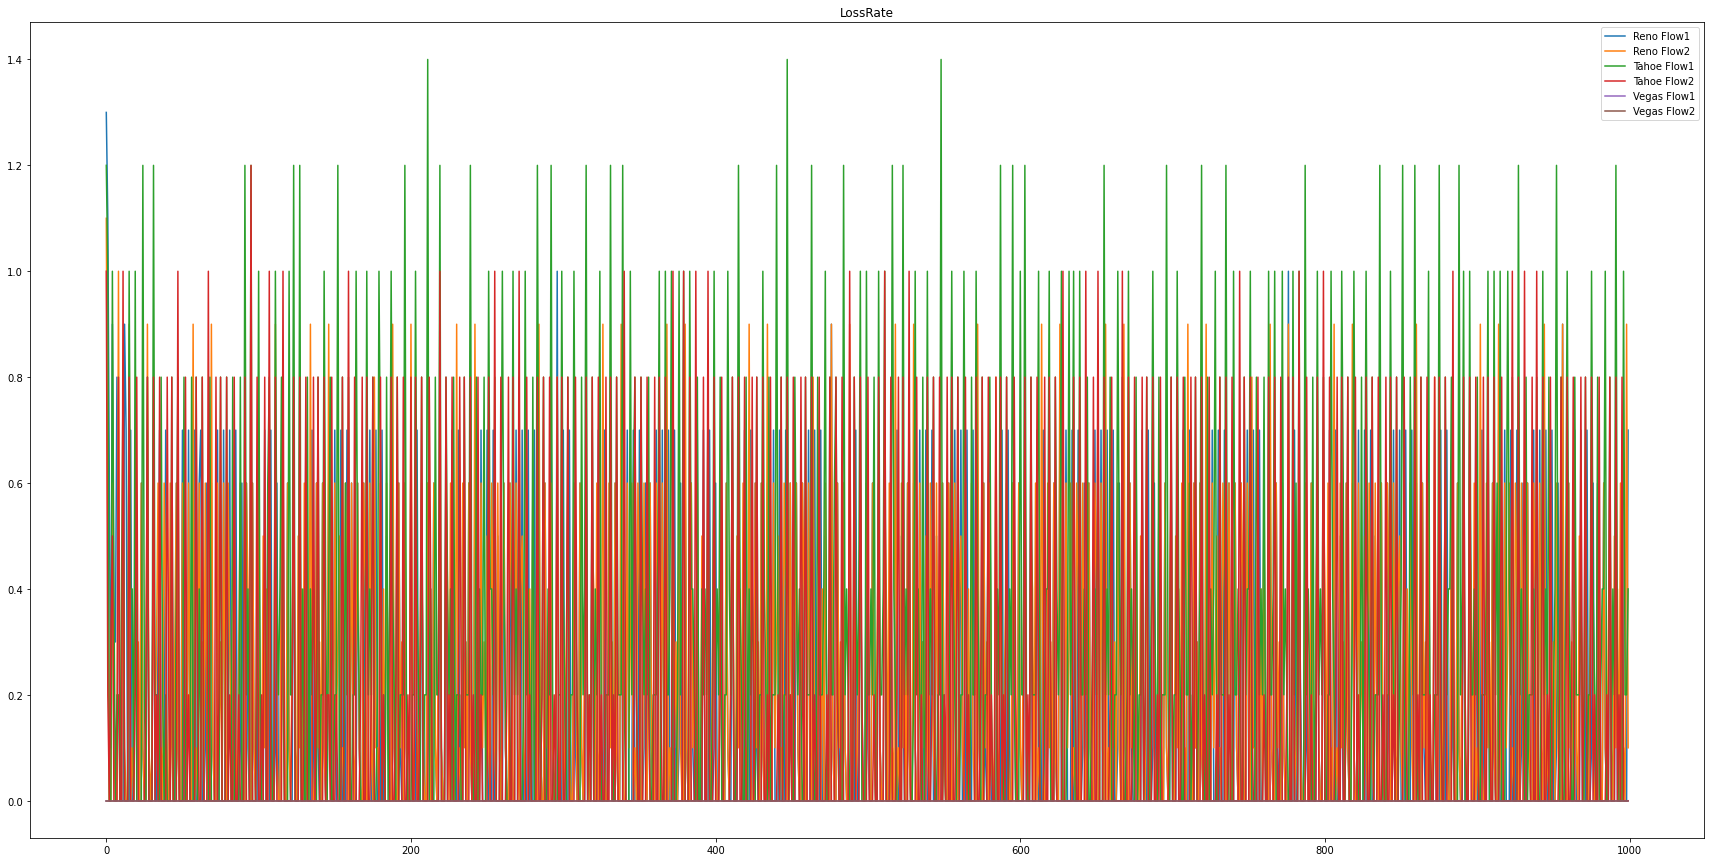

In [10]:
plt.figure(figsize=(30, 15))
plt.plot(reno[time_ind], reno[drop1_ind])
plt.plot(reno[time_ind], reno[drop2_ind])
plt.legend(['Flow1', 'Flow2'])
plt.title('LossRate Reno')
plt.savefig('plots/loss_reno.png')
plt.show()

plt.figure(figsize=(30, 15))
plt.plot(tahoe[time_ind], tahoe[drop1_ind])
plt.plot(tahoe[time_ind], tahoe[drop2_ind])
plt.legend(['Flow1', 'Flow2'])
plt.title('LossRate Tahoe')
plt.savefig('plots/loss_tahoe.png')
plt.show()

plt.figure(figsize=(30, 15))
plt.plot(vegas[time_ind], vegas[drop1_ind])
plt.plot(vegas[time_ind], vegas[drop2_ind])
plt.legend(['Flow1', 'Flow2'])
plt.title('LossRate Vegas')
plt.savefig('plots/loss_vegas.png')
plt.show()
#----------------------------------------------------
plt.figure(figsize=(30, 15))
plt.plot(reno[time_ind], reno[drop1_ind])
plt.plot(reno[time_ind], reno[drop2_ind])
plt.plot(tahoe[time_ind], tahoe[drop1_ind])
plt.plot(tahoe[time_ind], tahoe[drop2_ind])
plt.plot(vegas[time_ind], vegas[drop1_ind])
plt.plot(vegas[time_ind], vegas[drop2_ind])
plt.legend(['Reno Flow1', 'Reno Flow2', 'Tahoe Flow1', 'Tahoe Flow2', 'Vegas Flow1', 'Vegas Flow2'])
plt.title('LossRate')
plt.savefig('plots/loss_full.png')
plt.show()

# RTT

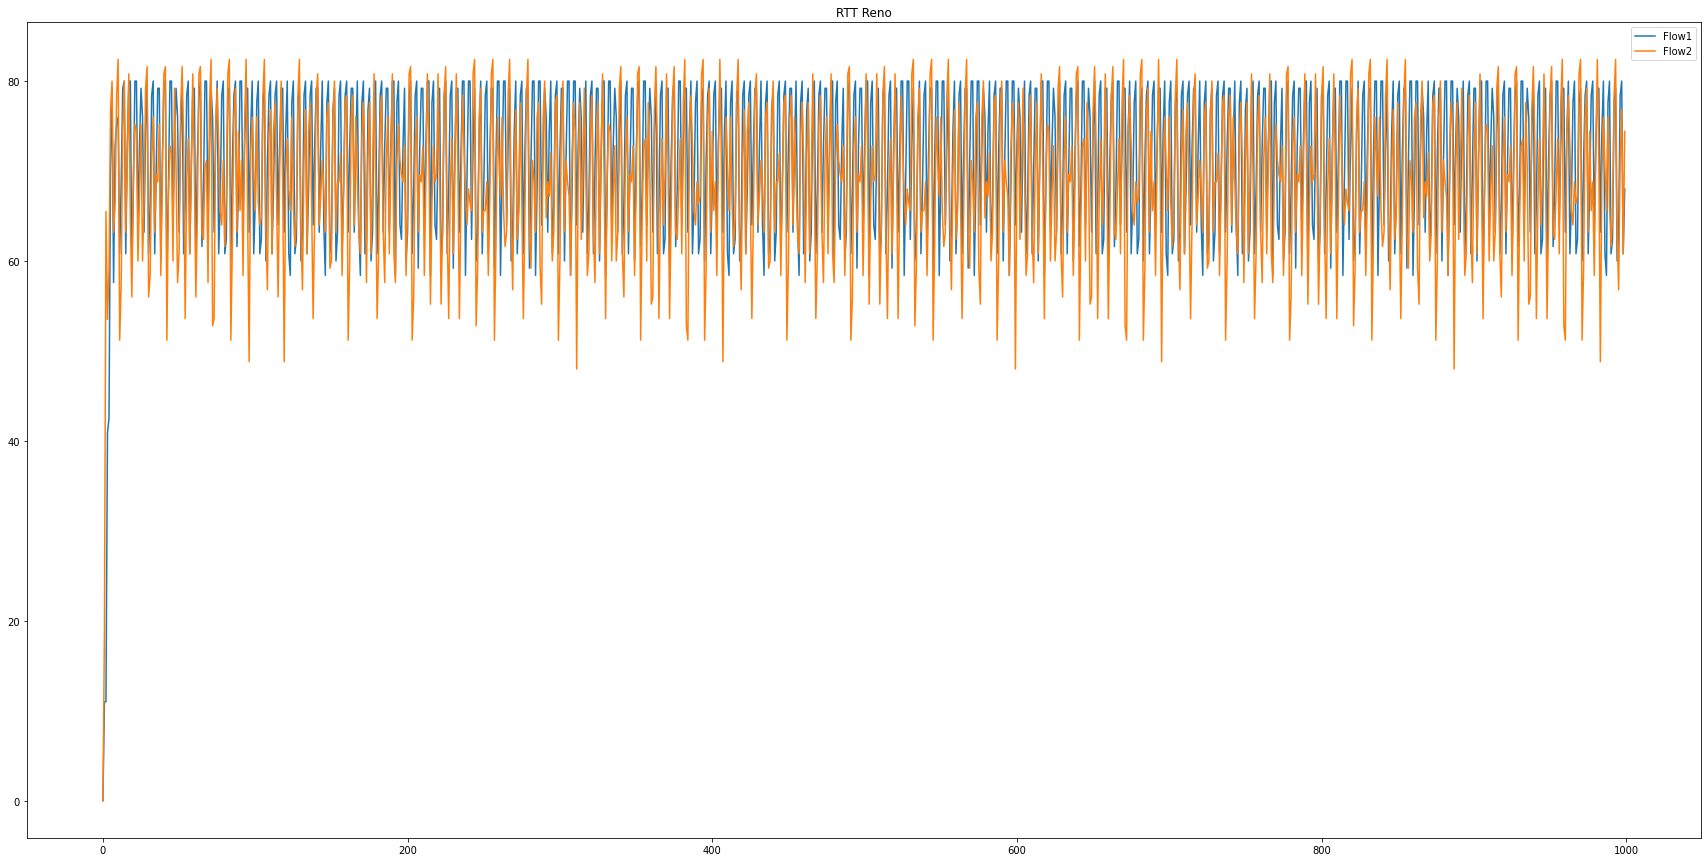

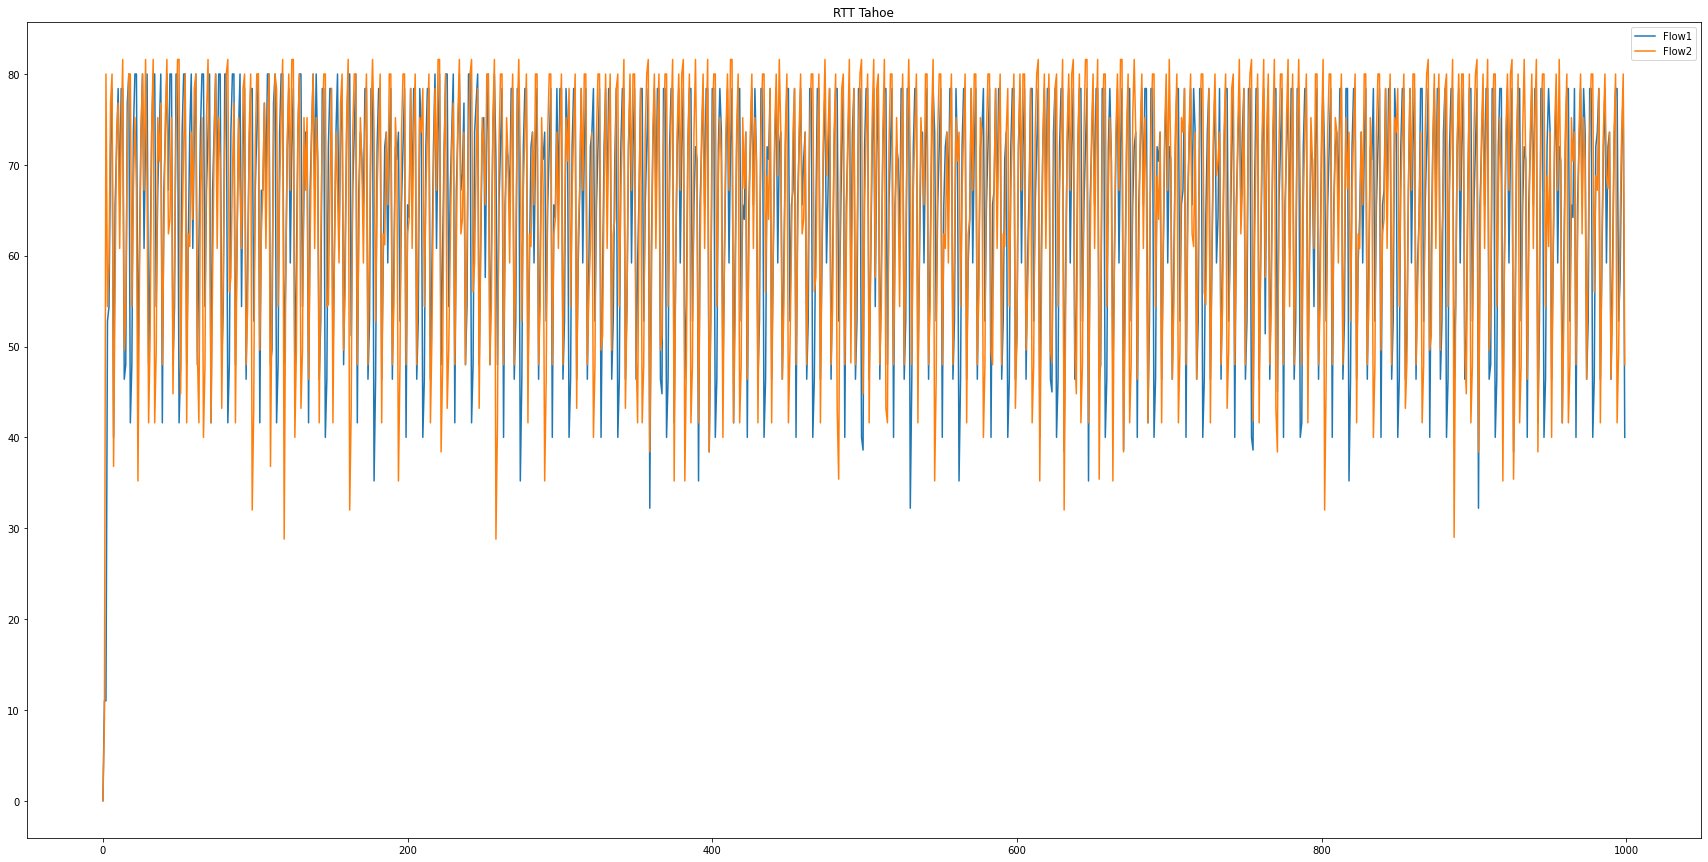

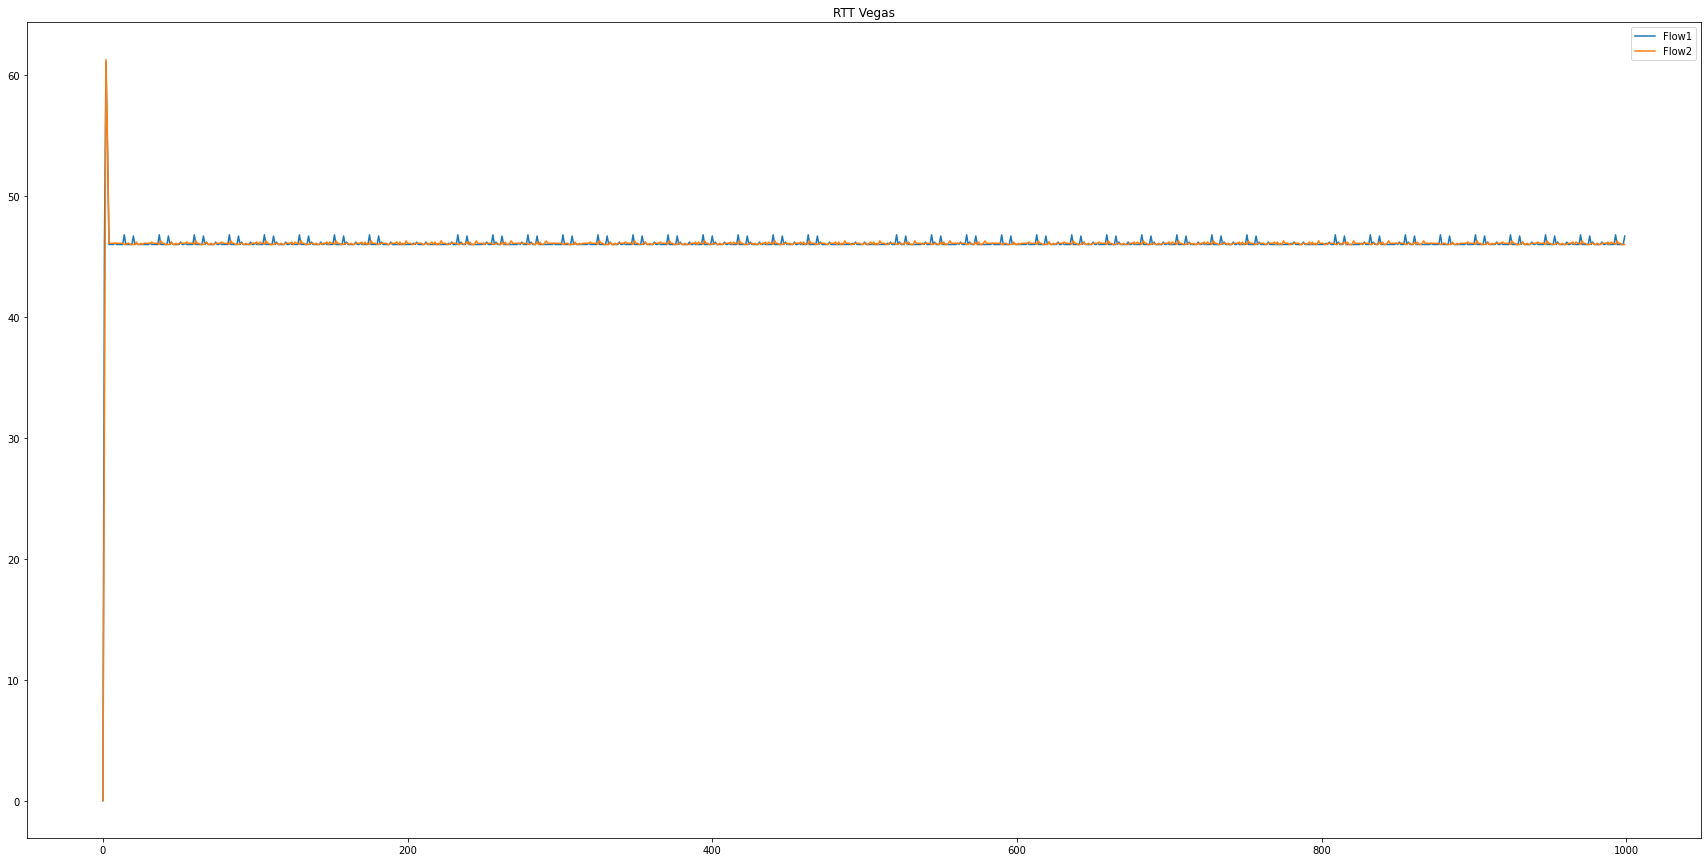

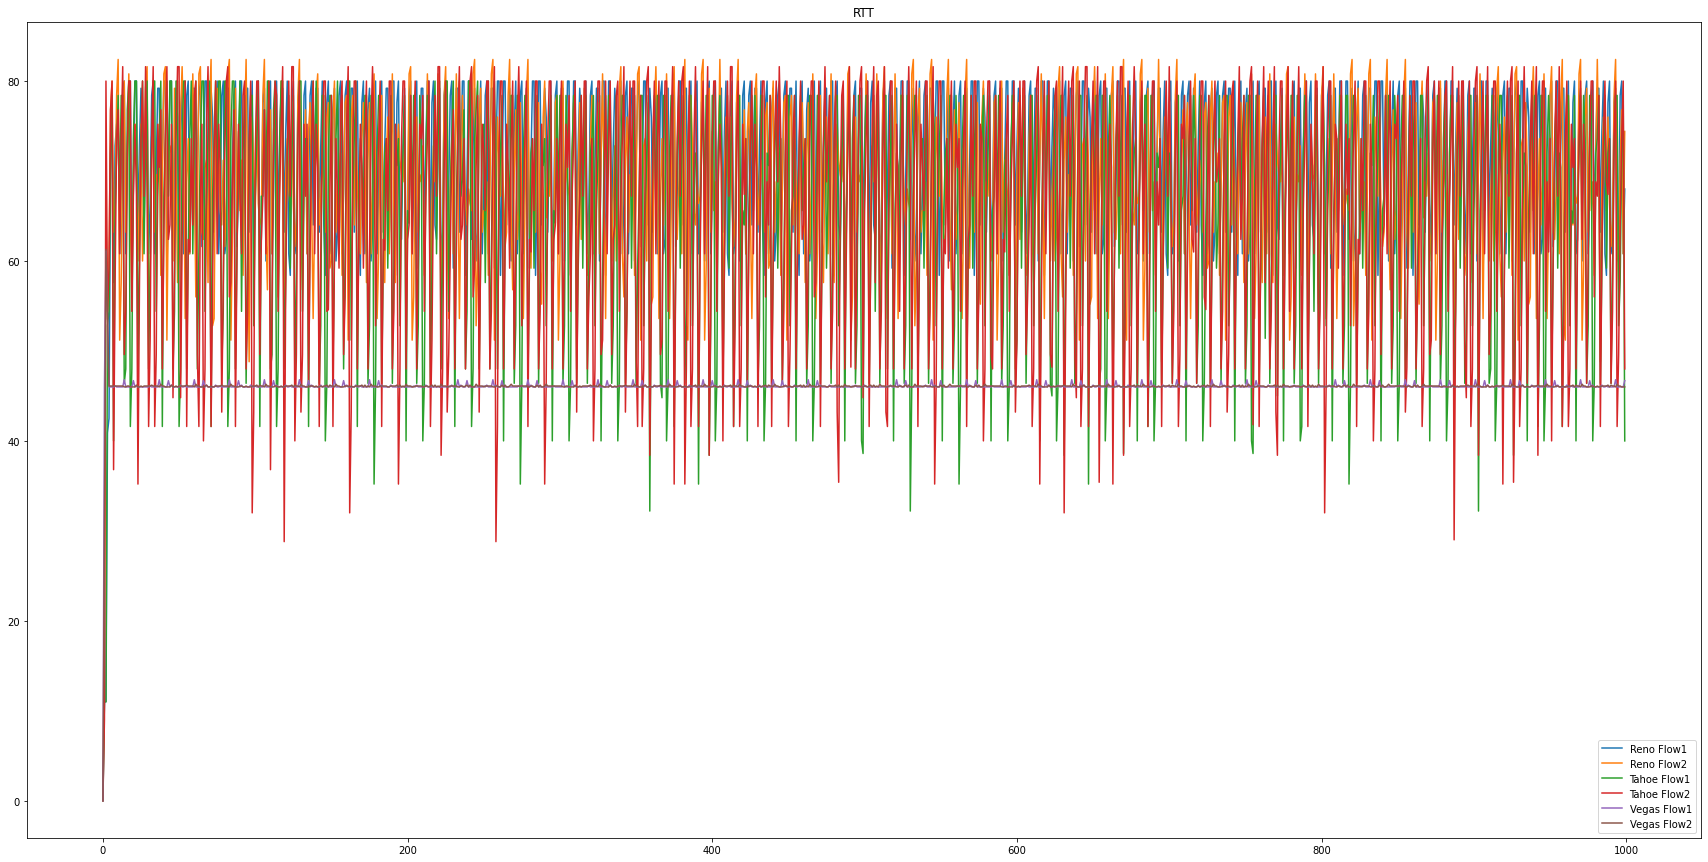

In [11]:
plt.figure(figsize=(30,15))
plt.plot(reno[time_ind], reno[rtt1_ind])
plt.plot(reno[time_ind], reno[rtt2_ind])
plt.legend(['Flow1', 'Flow2'])
plt.title('RTT Reno')
plt.savefig('plots/rtt_reno.png')
plt.show()

plt.figure(figsize=(30,15))
plt.plot(tahoe[time_ind], tahoe[rtt1_ind])
plt.plot(tahoe[time_ind], tahoe[rtt2_ind])
plt.legend(['Flow1', 'Flow2'])
plt.title('RTT Tahoe')
plt.savefig('plots/rtt_tahoe.png')
plt.show()

plt.figure(figsize=(30,15))
plt.plot(vegas[time_ind], vegas[rtt1_ind])
plt.plot(vegas[time_ind], vegas[rtt2_ind])
plt.legend(['Flow1', 'Flow2'])
plt.title('RTT Vegas')
plt.savefig('plots/rtt_vegas.png')
plt.show()
#-----------------------------------------------
plt.figure(figsize=(30,15))
plt.plot(reno[time_ind], reno[rtt1_ind])
plt.plot(reno[time_ind], reno[rtt2_ind])
plt.plot(tahoe[time_ind], tahoe[rtt1_ind])
plt.plot(tahoe[time_ind], tahoe[rtt2_ind])
plt.plot(vegas[time_ind], vegas[rtt1_ind])
plt.plot(vegas[time_ind], vegas[rtt2_ind])
plt.legend(['Reno Flow1', 'Reno Flow2', 'Tahoe Flow1', 'Tahoe Flow2', 'Vegas Flow1', 'Vegas Flow2'])
plt.title('RTT')
plt.savefig('plots/rtt_full.png')
plt.show()